## Cournot 
Ved Cournot-konkurranse er kvantum bedriftens handlingsvariable og bedriftene gjør sine valg simultant. Hver bedrift fastsette hvor mye de skal produsere. Prisen er gitt ved etterspørselsfunksjonen.

Når bedriftene skal sette kvantum, må de ta hensyn til at eget kvantum endrer på prisen i det felles markedet. 

Vi antar at vi har to bedrifter som konkurrer med kvantum som strategisk variabel. Invers ettersprøsel er gitt ved: P(Q) = a-bQ = a-b(q1+q2)

Kode her er basert på notebook fra seminar sok-2030 vår 2022 (Espen Sirnes).

In [2]:
import sympy as sp
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

Vi definerer så symbolene vi trenger. I Cournotkonkurranse fastsettes kvantum for bedrift 1 og 2,Q1 og Q2. Hver bedrift har marginalkostnader c1 og c2. Etterspørselsfunksjonen har et konstantledd a og negativt stignignstall med absoluttverdi b. Vi definerer derfor følgende variabler for modellen:

In [3]:
q1, q2,c1,c2, a, b=symbols('q1 q2 c1 c2 a b')

Vi kan nå definere de to funksjonene vi skal bruke. Profitt til bedriftene er lik: 
π1 = (P-c1)*q1=(a-b(q1+q2)-c1)*q1 og π2 = (P-c2)*q2=(a-b(q1+q2)-c2)*q2

In [4]:
def P_demand(Q,a,b):
    return a-b*Q

def profit(q1,q2,c,a,b):
    return (P_demand(q1+q2,a,b)-c)*q1

Førsteordensbetingelsen finner vi ved å derivere profittfunksjonene med hensyn på henholdsvis q1 og q2

In [5]:
d_profit1_Q=diff(profit(q1,q2,c1,a,b),q1)
d_profit2_Q=diff(profit(q2,q1,c2,a,b),q2)

display(d_profit1_Q)
display(d_profit2_Q)

a - b*q1 - b*(q1 + q2) - c1

a - b*q2 - b*(q1 + q2) - c2

In [6]:
sol=solve([d_profit1_Q,d_profit2_Q],[q1,q2])

display(sol[q1])
display(sol[q2])

(a - 2*c1 + c2)/(3*b)

(a + c1 - 2*c2)/(3*b)

In [7]:
R1=solve(d_profit1_Q,q1)
R2=solve(d_profit2_Q,q1)

In [8]:
#reaksjonsfunksjon til bedrift 1
q1_equ=sp.solve(d_profit1_Q,q1)[0]
q1_equ

(a - b*q2 - c1)/(2*b)

In [9]:
#reaksjonsfunksjon til bedrift 2
q2_equ=sp.solve(d_profit2_Q,q2)[0]
q2_equ

(a - b*q1 - c2)/(2*b)

Setter vi RF1 = RF2 finner vi optimalt kvantum for bedrifte 1 og 2

In [10]:
sol=solve([d_profit1_Q,d_profit2_Q],[q1,q2])

sol

{q1: (a - 2*c1 + c2)/(3*b), q2: (a + c1 - 2*c2)/(3*b)}

In [11]:
sol=solve([d_profit1_Q,d_profit2_Q],[q1,q2])

display(sol[q1])
display(sol[q2])

(a - 2*c1 + c2)/(3*b)

(a + c1 - 2*c2)/(3*b)

Vi kan nå lage en funksjon som gir den nummeriske løsningen gitt nummeriske argumenter, for sympy-uttrykkene over. Vi bruker lambdify-funksjonen i sympy for å lage en slik funksjon:

In [15]:
cournot=lambdify(
    (a,b,c1,c2), 
    (sol[q1],sol[q2])
)

For eksempel kan vi regne ut løsning ved en symmertisk likevekt der etterspørsel er P = 120 - 20Q, og marginalkosten til begge bedriftene er lik 20. Kvantum, q1 og q2, blir da henholdsvis:

In [16]:
cournot(120,20,20,20)

(1.6666666666666665, 1.6666666666666665)

Et eksempel med asymmetriske bedrifter, der c1 = 20 og c2 = 40 gir følgende likevektskvantum:

In [17]:
cournot(120,20,20,40)

(2.0, 1.0)

### Andvendelse og figur

In [18]:
R1=solve(d_profit1_Q,q2)
R2=solve(d_profit2_Q,q2)

R1=lambdify(
    (q1,a,b,c1), 
    R1[0]
)

R2=lambdify(
    (q1,a,b,c2), 
    R2[0]
)

display(R1(q2,a,b,c1))
display(R2(q2,a,b,c2))

(a - 2*b*q2 - c1)/b

(0.5*a - 0.5*b*q2 - 0.5*c2)/b

In [19]:
q = np.linspace(0,30,100)
a_value=40
b_value=1
c1_value=10
c2_value=10

In [20]:
cournot(a_value,b_value,c1_value,c2_value)

(10.0, 10.0)

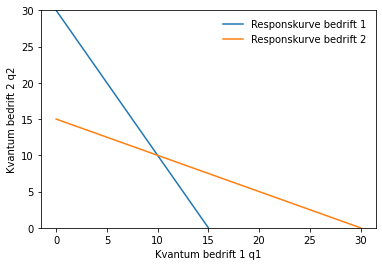

In [21]:
fig,ax=plt.subplots()
ax.set_ylabel('Kvantum bedrift 2 q2')
ax.set_xlabel('Kvantum bedrift 1 q1')


#drawing respons curves
ax.plot(q,
        R1(q,a_value,b_value,c1_value),
        label='Responskurve bedrift 1'
       )

ax.plot(q,
        R2(q,a_value,b_value,c2_value),
        label='Responskurve bedrift 2'
       )

#setting range for y-axis. 
plt.ylim((0,30))

#adding legend:
ax.legend(loc='upper right',frameon=False)

Q1sol, Q2sol=cournot(a_value,b_value,c1_value,c2_value)

In [22]:
print (P_demand(Q1sol+Q2sol,a_value,b_value))

20.0


In [24]:
print(f"""Løsningen er at 
bedrift 1 produserer {Q1sol} med profitt {profit(Q1sol,Q2sol,c1_value,a_value,b_value)} og 
bedrift 2 produserer {Q2sol} med profitt {profit(Q2sol,Q1sol,c2_value,a_value,b_value)}
prisen blir {P_demand(Q1sol+Q2sol,a_value,b_value)}""")

Løsningen er at 
bedrift 1 produserer 10.0 med profitt 100.0 og 
bedrift 2 produserer 10.0 med profitt 100.0
prisen blir 20.0
